In [1]:
%matplotlib inline
import matplotlib.pylab as plt
import numpy as np
import pandas as pd

# Import data

In [2]:
# read data from Excel file
df_all = pd.read_excel('../data/Tab_S2_GeneExpressionData.xls', sheetname='TCGA_OD_1p19qCodeletion')
df_all.head(10)

EntrezGeneID    EnsemblGeneID Chr    Start     Stop  Strand    Band  \
0        148398  ENSG00000187634   1   860260   879955       1  p36.33   
1         26155  ENSG00000188976   1   879584   894689      -1  p36.33   
2        339451  ENSG00000187961   1   895967   901095       1  p36.33   
3         57801  ENSG00000188290   1   934342   935552      -1  p36.33   
4          9636  ENSG00000187608   1   948803   949920       1  p36.33   
5        375790  ENSG00000188157   1   955503   991496       1  p36.33   
6         54991  ENSG00000131591   1  1017198  1051741      -1  p36.33   
7         51150  ENSG00000078808   1  1152288  1167411      -1  p36.33   
8        126792  ENSG00000176022   1  1167629  1170421       1  p36.33   
9        118424  ENSG00000160087   1  1189289  1209265      -1  p36.33   

       Gene  TCGA.CS.5390.01A  TCGA.CS.5396.01A        ...         \
0    SAMD11              2.80              1.55        ...          
1     NOC2L              5.96              5.53        ...          
2    KLHL17              2.43              2.32        ...          
3      HES4              1.64             -0.20        ...          
4     ISG15              3.16              4.47        ...          
5      AGRN              7.32              7.71        ...          
6  C1orf159              1.95              1.81        ...          
7      SDF4              6.16              6.22        ...          
8   B3GALT6              4.73              3.90        ...          
9    UBE2J2              4.84              4.37        ...          

   TCGA.TQ.A7RI.01A  TCGA.TQ.A7RN.01A  TCGA.TQ.A7RQ.01A  TCGA.TQ.A7RS.01A  \
0              3.84              2.85              3.40              4.43   
1              5.54              5.46              6.05              6.13   
2              2.78              3.42              3.44              3.63   
3              4.09              3.97              3.05              4.46   
4              3.66              3.88              3.29              3.48   
5              7.97              7.61              7.80              8.13   
6              2.84              2.60              2.49              2.81   
7              6.54              6.27              6.17              6.66   
8              4.49              4.64              4.47              4.80   
9              4.80              4.71              4.72              5.15   

   TCGA.TQ.A7RU.01A  TCGA.VM.A8CA.01A  TCGA.VM.A8CB.01A  TCGA.VM.A8CE.01A  \
0              4.15              1.30              4.40              4.15   
1              6.14              6.40              6.39              5.91   
2              3.40              2.79              4.12              3.29   
3              3.59              2.66              1.76              4.12   
4              3.48              4.89              2.75              3.56   
5              8.51              6.88              7.07              8.21   
6              3.06              3.03              3.40              2.94   
7              6.46              7.18              6.72              6.61   
8              4.91              5.27              5.07              4.59   
9              5.00              5.55              5.19              5.03   

   TCGA.VW.A7QS.01A  TCGA.W9.A837.01A  
0              3.90              2.83  
1              6.04              5.88  
2              3.89              2.62  
3              2.68              3.10  
4              2.97              3.44  
5              7.34              7.21  
6              2.45              2.27  
7              6.40              6.19  
8              4.46              4.53  
9              4.90              4.70  

[10 rows x 141 columns]

In [3]:
# get expression values from columns starting with 'TCGA.'
filter_col = [col for col in df_all if col.startswith('TCGA.')]
df = df_all[filter_col]
# rows: samples, cols: genes
df = df.transpose()

In [4]:
# make dictionary: index -> gene name
gene_names = df_all['Gene'].to_dict()
def dict_head(d, n):
    '''return first elements of dict, i.e. similar to df.head()''' 
    return dict(list(d.items())[0:n])
dict_head(gene_names, 4)

{0: 'SAMD11', 1: 'NOC2L', 2: 'KLHL17', 3: 'HES4'}

In [5]:
# print the number genes and samples
num_genes   = df.values.shape[1]
num_samples = df.values.shape[0]
print('Num genes: {:>9}\nNum samples: {:>8}'.format(num_genes, num_samples))


Num genes:     12285
Num samples:      133


** Should we normalize/standardize the data ?? **

Column-wise or row-size ??

In [6]:
standardize = False
if standardize:
    row_wise = True
    if row_wise:
        df_t = df.transpose()
        df = (df_t / df_t.mean()) / df_t.var() 
        df = df.transpose()
        del(df_t)
    else:
        df = (df / df.mean()) / df.var() 
df.head()

0      1      2      3      4      5      6      7      \
TCGA.CS.5390.01A   2.80   5.96   2.43   1.64   3.16   7.32   1.95   6.16   
TCGA.CS.5396.01A   1.55   5.53   2.32  -0.20   4.47   7.71   1.81   6.22   
TCGA.CS.6668.01A   2.09   5.92   2.48   0.69   2.12   7.48   1.79   5.95   
TCGA.CS.6670.01A   2.52   5.89   2.00   2.20   3.91   6.98   2.17   6.11   
TCGA.DB.5278.01A   3.46   5.89   2.25   2.42   2.99   7.85   2.31   6.19   

                  8      9      ...    12275  12276  12277  12278  12279  \
TCGA.CS.5390.01A   4.73   4.84  ...     5.88   4.49   3.69   3.88   4.35   
TCGA.CS.5396.01A   3.90   4.37  ...     5.59   5.07   5.40   3.97   4.78   
TCGA.CS.6668.01A   4.58   4.68  ...     6.00   4.75   4.64   3.14   4.63   
TCGA.CS.6670.01A   4.66   4.93  ...     5.67   5.06   4.42   4.38   4.27   
TCGA.DB.5278.01A   4.56   4.94  ...     5.68   5.25   4.67   4.16   4.39   

                  12280  12281  12282  12283  12284  
TCGA.CS.5390.01A   6.61   5.74   2.16   3.59   5.99  
TCGA.CS.5396.01A   6.76   5.71   2.61   5.21   6.38  
TCGA.CS.6668.01A   6.74   5.36   2.56   4.67   6.02  
TCGA.CS.6670.01A   6.48   5.14   1.88   3.51   5.83  
TCGA.DB.5278.01A   6.42   5.40   1.88   4.21   5.97  

[5 rows x 12285 columns]

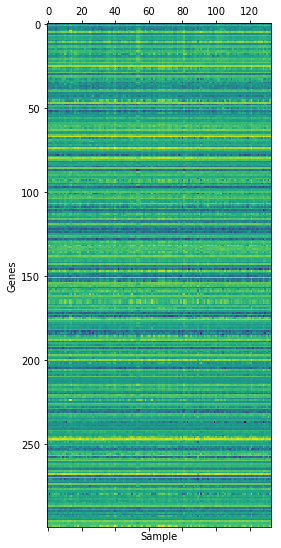

In [7]:
#plot the portion of the data
plt.figure(figsize=(10,10))
plt.matshow(df.T.head(300) )
plt.xlabel('Sample')
plt.ylabel('Genes')

# Training and test data

We try to predict the expression values of the first $n$ genes, based on all others. 

In [8]:
n = 50
dict_head(gene_names, n)

{0: 'SAMD11',
 1: 'NOC2L',
 2: 'KLHL17',
 3: 'HES4',
 4: 'ISG15',
 5: 'AGRN',
 6: 'C1orf159',
 7: 'SDF4',
 8: 'B3GALT6',
 9: 'UBE2J2',
 10: 'SCNN1D',
 11: 'ACAP3',
 12: 'PUSL1',
 13: 'CPSF3L',
 14: 'DVL1',
 15: 'MXRA8',
 16: 'AURKAIP1',
 17: 'CCNL2',
 18: 'VWA1',
 19: 'ATAD3B',
 20: 'ATAD3A',
 21: 'SSU72',
 22: 'MIB2',
 23: 'SLC35E2',
 24: 'NADK',
 25: 'GNB1',
 26: 'GABRD',
 27: 'PRKCZ',
 28: 'C1orf86',
 29: 'SKI',
 30: 'MORN1',
 31: 'RER1',
 32: 'PEX10',
 33: 'PLCH2',
 34: 'PANK4',
 35: 'HES5',
 36: 'TNFRSF14',
 37: 'PRDM16',
 38: 'MEGF6',
 39: 'TPRG1L',
 40: 'LRRC47',
 41: 'DFFB',
 42: 'C1orf174',
 43: 'AJAP1',
 44: 'NPHP4',
 45: 'KCNAB2',
 46: 'CHD5',
 47: 'RPL22',
 48: 'RNF207',
 49: 'ICMT'}

In [9]:
# data: expression values of genes > n
X = df.drop(list(range(n)), axis=1).values
# labels: expression values of first 5 genes
y = df[list(range(n))].values
print(X.shape)
print(y.shape)

(133, 12235)
(133, 50)


Separate training and test sets

In [10]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)


# Construct NN model

In [11]:
from keras.layers import Input, Dense 
from keras.models import Model
import keras.backend as K

Using TensorFlow backend.


In [12]:
def root_mean_squared_error(y_true, y_pred):
    return K.sqrt(K.mean(K.square(y_pred - y_true), axis=-1)) 

def get_model():
    '''Simple MLP with 2 hidden layers (6,5 M params).
    - Input is vector of all genes - genes to predict.
    - Output is a vector of predicted expression of predicted genes. '''

    i = Input(shape=(num_genes - n,))
    x = Dense(units=512, activation='relu')(i)
    x = Dense(units=512, activation='relu')(x)
    o = Dense(units=n, activation='linear')(x)
    
    model = Model(inputs=[i], outputs=[o])
    
    model.compile(optimizer='adam', 
                  loss=root_mean_squared_error, 
                  metrics=None, 
                  loss_weights=None)
    
    return model
    

In [13]:
model = get_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 12235)             0         
_________________________________________________________________
dense_1 (Dense)              (None, 512)               6264832   
_________________________________________________________________
dense_2 (Dense)              (None, 512)               262656    
_________________________________________________________________
dense_3 (Dense)              (None, 50)                25650     
Total params: 6,553,138
Trainable params: 6,553,138
Non-trainable params: 0
_________________________________________________________________


# Train model

In [14]:
from IPython.display import clear_output
from keras.callbacks import Callback
class PlotLearning(Callback):

    def on_train_begin(self, logs={}):
        self.i = 0
        self.x = []
        self.losses = []
        self.fscore = []
        self.recall = []
        self.precision = []
        self.val_losses = []
        self.val_fscore = []
        self.val_recall = []
        self.val_precision = []
        self.fig = plt.figure()
        
        self.logs = []

    def on_epoch_end(self, epoch, logs={}):
        
        self.logs.append(logs)
        self.x.append(self.i)
        self.losses.append(logs.get('loss'))
        self.val_losses.append(logs.get('val_loss'))
        
        self.i += 1
        f, ax = plt.subplots(1, 1, figsize=(8,6), sharex=True)
        clear_output(wait=True)
        
        ax.semilogy(self.x, self.losses, label="loss", lw=2)
        ax.semilogy(self.x, self.val_losses, label="val_loss")
        ax.set_ylim(bottom=0.)
        ax.legend()
        ax.set_xlabel('Epochs')
        ax.set_ylabel('Loss (RMSE)')
        plt.grid(True)
        plt.show();
        
plotLoss = PlotLearning()

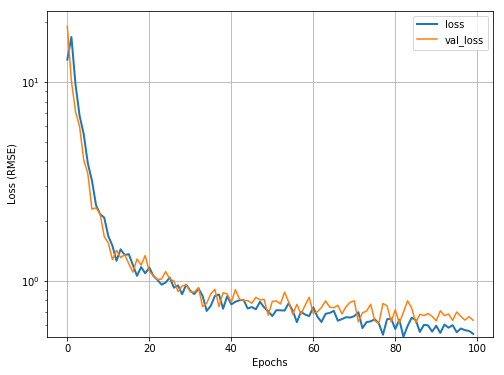

99/99 [==============================] - 1s 8ms/step - loss: 0.5437 - val_loss: 0.6360


In [15]:
model.fit(x=X_train, y=y_train, batch_size=64, epochs=100,
          validation_data=(X_test, y_test),
          callbacks=[plotLoss])

# Predict

In [16]:
y_pred = model.predict(X_test, batch_size = 32)
print(y_pred.shape)

(34, 50)


In [17]:
# set the colormap and centre the colorbar
# http://chris35wills.github.io/matplotlib_diverging_colorbar/
import matplotlib.colors as colors
class MidpointNormalize(colors.Normalize):
    """
    Normalise the colorbar so that diverging bars work there way either side from a prescribed midpoint value)
    e.g. im=ax1.imshow(array, norm=MidpointNormalize(midpoint=0.,vmin=-100, vmax=100))"""
    def __init__(self, vmin=None, vmax=None, midpoint=None, clip=False):
        self.midpoint = midpoint
        colors.Normalize.__init__(self, vmin, vmax, clip)

    def __call__(self, value, clip=None):
        # I'm ignoring masked values and all kinds of edge cases to make a simple example...
        x, y = [self.vmin, self.midpoint, self.vmax], [0, 0.5, 1]
        return np.ma.masked_array(np.interp(value, x, y), np.isnan(value))

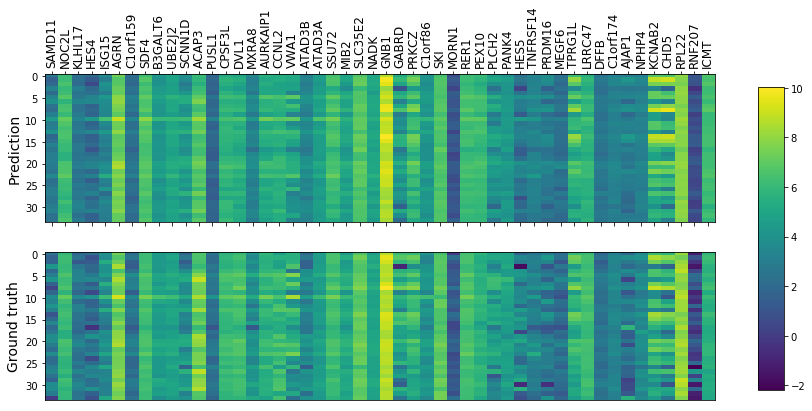

In [18]:
fig, ax = plt.subplots(2,1,figsize=(12,6), sharex=False, sharey=True)

diff = y_pred-y_test
vmin = min(y_pred.min(), y_test.min())
vmax = max(y_pred.max(), y_test.max())

im = ax[0].matshow(y_pred, aspect='auto', cmap='viridis', clim=(vmin, vmax))#cmap='bwr', clim=(vmin, vmax), norm=MidpointNormalize(midpoint=0.0, vmin=vmin, vmax=vmax))
ax[0].set_ylabel('Prediction', fontsize=14)
ax[0].set_xticks([])
ax[0].set_xticklabels([])
# set gene names on columns
ax[0].set_xticks(range(n))
_ = ax[0].set_xticklabels(gene_names.values(), rotation=90, fontsize=12)

cax2 = ax[1].matshow(y_test, aspect='auto', cmap='viridis', clim=(vmin, vmax)) #cmap='bwr', clim=(vmin, vmax), norm=MidpointNormalize(midpoint=0.0, vmin=vmin, vmax=vmax))
ax[1].set_ylabel('Ground truth', fontsize=14)
ax[1].set_xticks([])

cax = fig.add_axes([0.95, 0.15, 0.03, 0.7])
_ = fig.colorbar(im, cax=cax)
